# Data cleaning

In [2]:
# import libraries
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('bmh')
# packages for data cleaning function
import re
import string
import pickle

In [3]:
df = pd.read_csv(r'C:\Users\Lalit\Documents\twitter_data.csv', index_col=0)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [23]:
df['label'] = df['class'].replace(1, 0)

In [24]:
df['label'].unique()

array([2, 0], dtype=int64)

In [25]:
# changing hate speech to 1 and not hate speech to 0
# df['label'] = df['label'].replace(1, 0)
df['label'] = df['label'].replace(2, 1)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


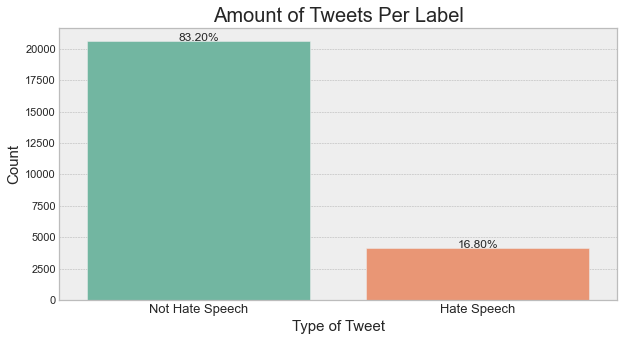

In [60]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['label'], palette='Set2')

ax.set_title('Amount of Tweets Per Label',fontsize = 20)
ax.set_xlabel('Type of Tweet',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
ax.set_xticklabels(['Not Hate Speech','Hate Speech'],fontsize = 13)

total = float(len(df)) # one person per row 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total * 100) + '%',
            ha="center") 

# plt.savefig('../visualizations/cleaned_class_imbalance.png', bbox_inches = "tight", pad_inches=.5)

In [27]:
# we can see that only 16% of the data is actual hate speech
df['label'].sum() / len(df['label'])

0.16797804946939435

In [38]:
# creating new dataframe `clean_df`
raw_df = df[['tweet', 'label']].copy()

In [10]:
# creating column for vote count for not hate speech tweets
# raw_df['other_votes'] = raw_df['offensive_language'] + raw_df['neither']

In [10]:
# reordering the columns and dropping the old 'offensive_language' and 'neither' columns
# raw_df = raw_df.reindex(columns=['total_votes', 'hate_speech_votes', 'other_votes','label', 'tweet'])

In [39]:
raw_df.head()

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,1
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0


In [13]:
# pickle the raw_data for later eda
raw_df.to_pickle(r"C:\Users\Lalit\Documents\AI_sentimentAnalysis\raw_tweets_df_new.pkl")

In [40]:
# cleaning the tweets

# copying new `clean_df` and cleaning up the tweets
clean_df = raw_df.copy()



In [41]:
clean_df.head()

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,1
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0


In [42]:
# function to clean all data
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    # make text lowercase
    text = text.lower()
    # removing text within brackets
    text = re.sub('\[.*?\]', '', text)
    # removing text within parentheses
    text = re.sub('\(.*?\)', '', text)
    # removing numbers
    text = re.sub('\w*\d\w*', '', text)
    # if there's more than 1 whitespace, then make it just 1
    text = re.sub('\s+', ' ', text)
    # if there's a new line, then make it a whitespace
    text = re.sub('\n', ' ', text)
    # removing any quotes
    text = re.sub('\"+', '', text)
    # removing &amp;
    text = re.sub('(\&amp\;)', '', text)
    # removing any usernames
    text = re.sub('(@[^\s]+)', '', text)
    # removing any hashtags
    text = re.sub('(#[^\s]+)', '', text)
    # remove `rt` for retweet
    text = re.sub('(rt)', '', text)
    # string.punctuation is a string of all punctuation marks
    # so this gets rid of all punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # getting rid of `httptco`
    text = re.sub('(httptco)', '', text)

    return text

round1 = lambda x: clean_text_round1(x)

In [43]:
# appling data cleaning function to `tweet` column
clean_df['clean_tweets'] = clean_df['tweet'].apply(clean_text_round1)

In [44]:
clean_df.head(10)

,tweet,label,clean_tweets
0,!!! RT @mayasolovely: As a woman you shouldn't...,1,as a woman you shouldnt complain about clea...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0,boy dats coldtyga dwn bad for cuffin dat ho...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0,dawg you ever fuck a bitch and she sta to...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0,she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0,the shit you hear about me might be true or...
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",0,the shit just blows meclaim you so faithful a...
6,"!!!!!!""@__BrighterDays: I can not just sit up ...",0,i can not just sit up and hate on another bit...
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,0,cause im tired of you big bitches coming for ...
8,""" &amp; you might not get ya bitch back &amp; ...",0,you might not get ya bitch back thats that
9,""" @rhythmixx_ :hobbies include: fighting Maria...",0,hobbies include fighting mariam bitch


In [45]:
# checking for missing values
clean_df.isnull().sum()

tweet           0
label           0
clean_tweets    0
dtype: int64

In [46]:
# pickle clean_df for futher use
clean_df.to_pickle(r"C:\Users\Lalit\Documents\AI_sentimentAnalysis\clean_df_new.pkl")

In [73]:
df_hate = clean_df[clean_df.label==1]
df_hate

,tweet,label,clean_tweets
0,!!! RT @mayasolovely: As a woman you shouldn't...,1,as a woman you shouldnt complain about clea...
40,""" momma said no pussy cats inside my doghouse """,1,momma said no pussy cats inside my doghouse
63,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",1,simplyaddictedtoguys woof woof hot scally lad
66,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",1,woof woof and hot soles
67,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",1,lemmie eat a oreo do these dishes one oreo lol
...,...,...,...
25249,yaya ho.. cute avi tho RT @ViVaLa_Ari I had no...,1,yaya ho cute avi tho i had no idea she was s...
25250,yea so about @N_tel 's new friend.. all my fri...,1,yea so about s new friend all my friends kno ...
25280,"you know what they say, the early bird gets th...",1,you know what they say the early bird gets the...
25292,"you've gone and broke the wrong heart baby, an...",1,youve gone and broke the wrong hea baby and dr...


In [70]:
# randomly choosing the not hate rows
df_label_not_hate = clean_df[clean_df.label==0]
random_df_label_not_hate = df_label_not_hate.sample(4163)
random_df_label_not_hate

,tweet,label,clean_tweets
18259,RT @TrueNovacane: @UFUCKIN_RIGHT hell nahh. If...,0,hell nahh if a bitch had respect for her ow...
8252,Biggest booth I ever seen lastnight bitch had ...,0,biggest booth i ever seen lastnight bitch had ...
17582,RT @Sam_James3: @will123_william @haydenhill13...,0,i dont care tho cracker
1160,"&#8220;@BeenSlimm: Too many ""lil niggas"" on my...",0,too many lil niggas on my tl vqgezmmwws boosi...
7014,@penisgravy \nIs dem? I wants to has my weenis...,0,is dem i wants to has my weenis swingin but d...
...,...,...,...
9048,"Don't know no ugly bitches, don't know no brok...",0,dont know no ugly bitches dont know no broke n...
11647,I'm only on here cause my bitch tripping &#128...,0,im only on here cause my bitch tripping
4273,@MoenKiana fine walk bitch,0,fine walk bitch
24430,hoes pick me like dandelions #PickMe,0,hoes pick me like dandelions


In [79]:
from sklearn.utils import shuffle
new_train_df = df_hate.append(random_df_label_not_hate, ignore_index=True)
new_train_df = shuffle(new_train_df)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


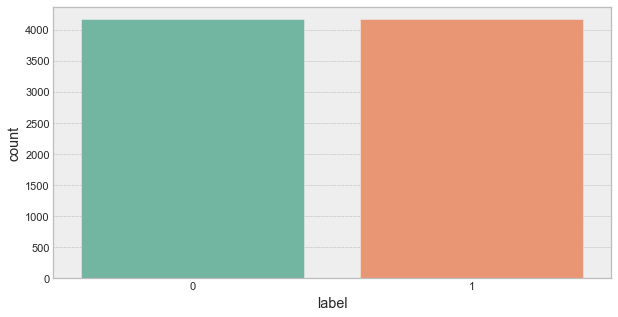

In [82]:
plt.figure(figsize = (10,5))
ax = sns.countplot(new_train_df['label'], palette='Set2')

In [81]:
new_train_df
# pickle clean_df for futher use
new_train_df.to_pickle(r"C:\Users\Lalit\Documents\AI_sentimentAnalysis\train_df_.pkl")